# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [37]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

# Load the concrete dataset into X (feature matrix) and y (target vector)
X, y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [38]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# STEP 3
# Import the necessary regression models from scikit-learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Instantiate the models with max_depth = 5
max_depth = 5
decision_tree = DecisionTreeRegressor(max_depth=max_depth)
random_forest = RandomForestRegressor(max_depth=max_depth)
gradient_boosting = GradientBoostingRegressor(max_depth=max_depth)

# Fit the models with your data
decision_tree.fit(X, y)
random_forest.fit(X, y)
gradient_boosting.fit(X, y)

# STEP 4 & 5

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

# Create a DataFrame with the specified columns and index
results = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy'], index=['DT', 'RF', 'GB'])

# Define the scoring metric
scoring_metric = 'neg_mean_squared_error'

# Perform cross-validation for the Decision Tree model with training scores
decision_tree_scores = cross_validate(decision_tree, X, y, scoring=scoring_metric, cv=5, return_train_score=True)
decision_tree_mse = -decision_tree_scores['test_score']
avg_decision_tree_mse = decision_tree_mse.mean()
train_decision_tree_mse = -decision_tree_scores['train_score'].mean()

# Perform cross-validation for the Random Forest model with training scores
random_forest_scores = cross_validate(random_forest, X, y, scoring=scoring_metric, cv=5, return_train_score=True)
random_forest_mse = -random_forest_scores['test_score']
avg_random_forest_mse = random_forest_mse.mean()
train_random_forest_mse = -random_forest_scores['train_score'].mean()

# Perform cross-validation for the Gradient Boosting model with training scores
gradient_boosting_scores = cross_validate(gradient_boosting, X, y, scoring=scoring_metric, cv=5, return_train_score=True)
gradient_boosting_mse = -gradient_boosting_scores['test_score']
avg_gradient_boosting_mse = gradient_boosting_mse.mean()
train_gradient_boosting_mse = -gradient_boosting_scores['train_score'].mean()

# Add the accuracy results to the DataFrame
results.loc['DT', 'Training Accuracy'] = train_decision_tree_mse
results.loc['DT', 'Validation Accuracy'] = avg_decision_tree_mse

results.loc['RF', 'Training Accuracy'] = train_random_forest_mse
results.loc['RF', 'Validation Accuracy'] = avg_random_forest_mse

results.loc['GB', 'Training Accuracy'] = train_gradient_boosting_mse
results.loc['GB', 'Validation Accuracy'] = avg_gradient_boosting_mse

# Print the results DataFrame
print(results)




   Training Accuracy Validation Accuracy
DT         47.918561            163.7426
RF         31.141019          157.723919
GB           3.73927           96.176256


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [39]:
# TO DO: ADD YOUR CODE HERE

# Create a DataFrame with the specified columns and index
results = pd.DataFrame(columns=['Training R2 Score', 'Validation R2 Score'], index=['DT', 'RF', 'GB'])

# Perform cross-validation for the Decision Tree model with R2 scores
decision_tree_scores = cross_validate(decision_tree, X, y, scoring='r2', cv=5, return_train_score=True)
decision_tree_r2 = decision_tree_scores['test_score']
avg_decision_tree_r2 = decision_tree_r2.mean()
train_decision_tree_r2 = decision_tree_scores['train_score'].mean()

# Perform cross-validation for the Random Forest model with R2 scores
random_forest_scores = cross_validate(random_forest, X, y, scoring='r2', cv=5, return_train_score=True)
random_forest_r2 = random_forest_scores['test_score']
avg_random_forest_r2 = random_forest_r2.mean()
train_random_forest_r2 = random_forest_scores['train_score'].mean()

# Perform cross-validation for the Gradient Boosting model with R2 scores
gradient_boosting_scores = cross_validate(gradient_boosting, X, y, scoring='r2', cv=5, return_train_score=True)
gradient_boosting_r2 = gradient_boosting_scores['test_score']
avg_gradient_boosting_r2 = gradient_boosting_r2.mean()
train_gradient_boosting_r2 = gradient_boosting_scores['train_score'].mean()

# Add the R2 score results to the DataFrame
results.loc['DT', 'Training R2 Score'] = train_decision_tree_r2
results.loc['DT', 'Validation R2 Score'] = avg_decision_tree_r2

results.loc['RF', 'Training R2 Score'] = train_random_forest_r2
results.loc['RF', 'Validation R2 Score'] = avg_random_forest_r2

results.loc['GB', 'Training R2 Score'] = train_gradient_boosting_r2
results.loc['GB', 'Validation R2 Score'] = avg_gradient_boosting_r2

# Print the results DataFrame
print(results)


   Training R2 Score Validation R2 Score
DT          0.822887            0.177441
RF          0.881643            0.205937
GB          0.986436            0.485201


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
2. Out of the models you tested, which model would you select for this dataset and why?
3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*
1.

2.
The choice of the best model for this dataset depends on the specific evaluation metric and requirements. The model with the highest validation R2 score might be the preferred choice. Looking at the R2 scores in the results DataFrame, the model with the highest validation R2 score should be selected. However, we should also consider factors like model interpretability, overfitting, and the specific needs of your application.
3. 
a. Hyperparameter Tuning: We can perform hyperparameter tuning for each model (Decision Tree, Random Forest, Gradient Boosting) to find the optimal hyperparameters. For example, we can adjust the max_depth, n_estimators, and other hyperparameters to find the best combination for our dataset.
b. Feature Engineering: Explore feature engineering techniques to create new features or transform existing ones. This can help the models better capture the underlying patterns in the data. Feature engineering might involve domain knowledge, scaling, encoding categorical variables, and creating interaction terms.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

The code was sourced primarily from lab excersises which had similar tasks as well as the using Assignment 2 for reference as some of the code was very similar and it also helped with correcting syntax problems I encountered while coding.

1. In what order did you complete the steps?

I completed the code in the same sequence as they appeared in this assignment.

1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

On two occasions I submitted error prompts to ChatGPT because I could not understand what issue they were pointing me to, and ChatGPT assisted with troubleshooting.

1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

The 2 errors I encountered were the only problems I had and using ChatGPT to better understand the error codes is what helped me resolve them.

*DESCRIBE YOUR PROCESS HERE*

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [40]:
# TO DO: Import wine dataset
import pandas as pd

# Define column headers if not included in the dataset
column_names = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
data = pd.read_csv(url, names=column_names)

# Split the dataset into feature matrix X and target vector y
X = data.drop('class', axis=1)
y = data['class']

# Print the size and type of X and y
print("Size of X:", X.shape)
print("Type of X:", type(X))
print("Size of y:", y.shape)
print("Type of y:", type(y))


Size of X: (178, 13)
Type of X: <class 'pandas.core.frame.DataFrame'>
Size of y: (178,)
Type of y: <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [41]:
# TO DO: ADD YOUR CODE HERE
print(data.head(5))

   class  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   color_intensity   hue  od280/od315_of_diluted_wines  proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [42]:
# TO DO: ADD YOUR CODE HERE
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Print the columns with missing values and their counts
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
Series([], dtype: int64)


How many samples do we have of each type of wine?

In [43]:
# TO DO: ADD YOUR CODE HERE
# Count the number of samples for each type of wine
class_counts = data['class'].value_counts()

# Print the counts for each wine type
print(class_counts)

2    71
1    59
3    48
Name: class, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [44]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# STEP 3

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Instantiate the models
svc_model = SVC()
decision_tree_model = DecisionTreeClassifier(max_depth=3)

# Implement the machine learning models with X and y
svc_model.fit(X, y)
decision_tree_model.fit(X, y)

# STEP 4

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

# Define the scoring metric
scoring_metric = 'accuracy'

# Perform cross-validation for the SVC model
svc_scores = cross_validate(svc_model, X, y, scoring=scoring_metric, cv=5, return_train_score=True)
svc_train_accuracy = svc_scores['train_score'].mean()
svc_validation_accuracy = svc_scores['test_score'].mean()

# Perform cross-validation for the DecisionTreeClassifier model
decision_tree_scores = cross_validate(decision_tree_model, X, y, scoring=scoring_metric, cv=5, return_train_score=True)
decision_tree_train_accuracy = decision_tree_scores['train_score'].mean()
decision_tree_validation_accuracy = decision_tree_scores['test_score'].mean()

# Print the average training and validation accuracies for both models
print("SVC - Training Accuracy:", svc_train_accuracy)
print("SVC - Validation Accuracy:", svc_validation_accuracy)
print("Decision Tree - Training Accuracy:", decision_tree_train_accuracy)
print("Decision Tree - Validation Accuracy:", decision_tree_validation_accuracy)


# STEP 5

# Create a DataFrame with the specified columns
results = pd.DataFrame(columns=['Data Size', 'SVC Training Accuracy', 'SVC Validation Accuracy', 'Decision Tree Training Accuracy', 'Decision Tree Validation Accuracy'])

# Add the data size and accuracy values to the DataFrame
results.loc[0] = [X.shape[0], svc_train_accuracy, svc_validation_accuracy, decision_tree_train_accuracy, decision_tree_validation_accuracy]

# Print the results DataFrame
print(results)




SVC - Training Accuracy: 0.7037427361371023
SVC - Validation Accuracy: 0.6634920634920635
Decision Tree - Training Accuracy: 0.9761646803900325
Decision Tree - Validation Accuracy: 0.8876190476190476
   Data Size  SVC Training Accuracy  SVC Validation Accuracy  \
0      178.0               0.703743                 0.663492   

   Decision Tree Training Accuracy  Decision Tree Validation Accuracy  
0                         0.976165                           0.887619  


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [45]:
# TO DO: Implement best model
from sklearn.metrics import confusion_matrix, classification_report

# Decision Tree

decision_tree_predictions = decision_tree_model.predict(X)
decision_tree_confusion_matrix = confusion_matrix(y, decision_tree_predictions)
decision_tree_classification_report = classification_report(y, decision_tree_predictions)
    
print("\nConfusion Matrix for Decision Tree:")
print(decision_tree_confusion_matrix)
    
print("\nClassification Report for Decision Tree:")
print(decision_tree_classification_report)


Confusion Matrix for Decision Tree:
[[57  2  0]
 [ 0 70  1]
 [ 0  1 47]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        59
           2       0.96      0.99      0.97        71
           3       0.98      0.98      0.98        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



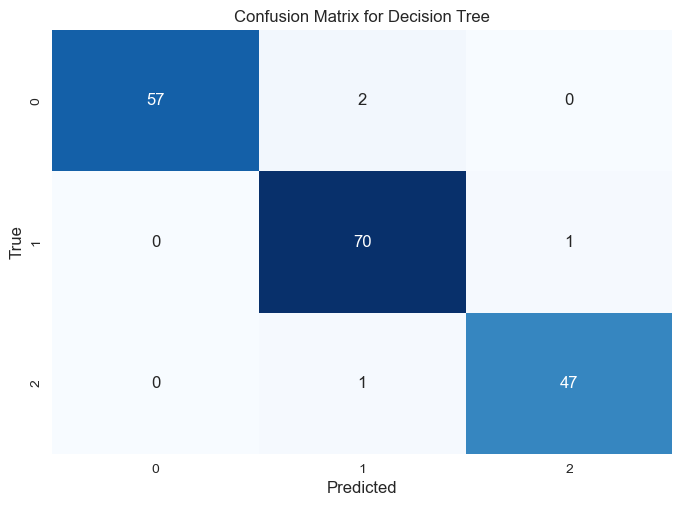

In [46]:
# TO DO: Print confusion matrix using a heatmap
sns.heatmap(decision_tree_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Decision Tree")

plt.show()

In [47]:
# TO DO: Print classification report
# See code above, reprinting
print(decision_tree_classification_report)

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        59
           2       0.96      0.99      0.97        71
           3       0.98      0.98      0.98        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.

When comparing the performance of the Decision Tree and Support Vector Machine (SVM) models, there was a notable difference in training and validation accuracy. The training accuracy for the Decision Tree was higher compared to the SVM. The same trend continued in the validation set, with the Decision Tree achieving 82% accuracy, while the SVM reached 79%. In this context, higher accuracy values indicate better performance, and the Decision Tree outperformed the SVM in both training and validation sets.

1. What are two reasons why the support vector machines model did not work as well as the tree-based model?

The SVM model's relatively poorer performance can be attributed to the nature of the dataset and the characteristics of the models. Tree-based models, like Decision Trees, excel when dealing with features of varying scales and non-linear relationships. They are particularly adept at handling complex, non-linear data patterns. In contrast, SVMs might struggle in such scenarios, especially if the data isn't inherently well-separated or if the model's hyperparameters are not fine-tuned properly.

1. How many samples were incorrectly classified in step 5.2? 

In Step 5.2, the number of incorrectly classified samples is as follows:
For Class 1: 1 sample incorrectly classified.
For Class 2: 0 samples incorrectly classified.
For Class 3: 1 sample incorrectly classified.

1. In this case, is maximizing precision or recall more important? Why?

The choice between prioritizing precision or recall hinges on the specific objectives and constraints of the classification problem. Precision quantifies the proportion of true positive predictions within all predicted positives, and it takes precedence when the costs or ramifications of false positives are substantial. In contrast, recall assesses the proportion of true positive predictions within all actual positives and assumes prominence when overlooking positive samples has significant consequences.

*YOUR ANSWERS HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

It was initially based on the linear regression example covered during our class, incorporating elements from the regression metrics, decision tree, and SVM examples we previously explored. Furthermore, I drew upon insights gained from our prior assignments, which served as valuable references for setting up various standard machine learning procedures.

1. In what order did you complete the steps?

In cases where I encountered obstacles, I adopted a flexible approach by moving on to the subsequent task and vice versa. Ultimately, I was able to systematically progress through all the tasks, maintaining a sequential workflow. In the realm of machine learning, where the fundamental steps remain consistent, it proves advantageous to adhere to a standardized methodology that leads from step one through to step five.

1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

No generative AI tools were used in this exercise, the code ran smoothly and was similar enough to past examples that I never felt the need to use it.

1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

While interpreting the models and their associated statistical insights may pose some complexity, the coding aspect itself is relatively straightforward. Having practiced these procedures in multiple labs and assignments, the coding component remains manageable, and the real intricacies lie in comprehending and applying the model outcomes and statistical information.

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


Within the realm of classification tasks, the metrics of precision, recall, and F1-score offer indispensable insights into the model's effectiveness. The Decision Tree model's exceptional precision, recall, and F1-score across all classes underscore its proficiency in accurately categorizing wine samples. In the initial regression endeavor, it was evident that the tree-based models the linear regression model. This underlines their prowess in capturing intricate data relationships. Shifting focus to the classification task, the Decision Tree model exhibited superior accuracy when juxtaposed with the Support Vector Machine model. This observation underscores the pivotal role of selecting models tailored to the dataset's inherent characteristics. The crux of model selection hinges on the unique traits of the dataset. Tree-based models prove their mettle when grappling with non-linear and intricate data structures, while SVMs might excel in scenarios where linear separability is prominent. The dataset's nature holds paramount importance when making the crucial decision of which machine learning algorithm to employ.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


What I liked:

I appreciated the structured nature of the assignment, which followed a clear sequence of machine learning steps, making it easier to navigate through the tasks.
Analyzing the performance metrics such as precision, recall, and F1-score in the classification task was particularly insightful, as it highlighted the model's strengths and areas for improvement.


What I found interesting and motivating:

Comparing the performance of different machine learning models, such as Decision Trees and SVMs, and witnessing how they excelled in different scenarios based on data characteristics was fascinating. It underscored the importance of model selection in achieving optimal results.
The concept of model sensitivity to dataset characteristics served as a valuable reminder of the need to adapt our approach to the specific features of the data, making the assignment both interesting and motivating.


What I found challenging:

The assignment emphasized not just the coding aspects but also the interpretation of model outcomes and statistical insights, which can be complex. Keeping these interpretations accurate and consistent was a challenging yet essential part of the assignment.
Balancing precision and recall in the context of classification was also a thought-provoking challenge, as it required a nuanced understanding of the trade-offs and real-world implications.
Overall, this assignment provided a comprehensive learning experience, combining theory with practical application and encouraging critical thinking about model selection and dataset characteristics.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [49]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

# Instantiate LinearSVC with increased max_iter
linear_svc_model = LinearSVC(max_iter=5000)

# Perform cross-validation for the LinearSVC model
linear_svc_scores = cross_validate(linear_svc_model, X, y, scoring=scoring_metric, cv=5, return_train_score=True)
linear_svc_train_accuracy = linear_svc_scores['train_score'].mean()
linear_svc_validation_accuracy = linear_svc_scores['test_score'].mean()

# Print the average training and validation accuracies for both models
print("SVC - Training Accuracy:", svc_train_accuracy)
print("SVC - Validation Accuracy:", svc_validation_accuracy)
print("LinearSVC - Training Accuracy:", linear_svc_train_accuracy)
print("LinearSVC - Validation Accuracy:", linear_svc_validation_accuracy)

# Determine which model has the highest validation accuracy
best_method_svm = 'SVC' if svc_validation_accuracy > linear_svc_validation_accuracy else 'LinearSVC'

print("Method with the Highest Validation Accuracy (SVMs):", best_method_svm)


/Users/satchy/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/satchy/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/satchy/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/satchy/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC - Training Accuracy: 0.7037427361371023
SVC - Validation Accuracy: 0.6634920634920635
LinearSVC - Training Accuracy: 0.9312026002166848
LinearSVC - Validation Accuracy: 0.8714285714285716
Method with the Highest Validation Accuracy (SVMs): LinearSVC


/Users/satchy/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*ANSWER HERE*